In [29]:
# coding: utf-8
from __future__ import print_function
from sympy import *
from sympy.abc import psi,phi,eta,delta,zeta

init_printing()
f,ck,c = symbols('f ck c', real=True)
sigma, kappa = symbols(r'\sigma \kappa', real=True)
kx, ky, kh =  symbols('k_x k_y k_h', real=True)
u,v =  symbols('u v')

def subsigma(M):
    M = M.subs(f**2 + ck**2,  sigma**2)
    M = M.subs(f**2 + c**2*kappa**2, sigma**2)
    return M
    
def simplifysigma(M):
    M = M.subs(sigma, sqrt(f**2 + ck**2) )
    M = simplify(M)
    return subsigma(M)
    
def subkappa(M):
    M = M.subs(kx**2 + ky**2,  kappa**2)
    M = M.subs(kh*kh.conjugate(), kappa**2)
    M = M.subs(kx*kx.conjugate() + ky*ky.conjugate(), kappa**2)
    return M

def simplifykappa(M):
    M = M.subs(kappa, sqrt(kx**2 + ky**2))
    M = M.subs(kh, sqrt(kx**2 + ky**2))
    M = simplify(M)
    return subkappa(M)
    
def subck(M):
    return M.subs(ck,c*kappa)

In [20]:
A = Matrix(( [0, 1j*f,0],[-1j*f, 0, -1j*ck],[0,1j*ck,0]))
X = A.eigenvects()
eigenvals = list()
eigenvects = list()
for i in xrange(3):
    eigval, multi, eigvect =  X[i]
    eigenvals.append(eigval)
    eigenvects.append(eigvect[0])

### Eigenvectors and eigenvalues

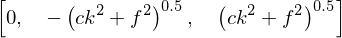

In [27]:
eigenvals

### Normal mode decomposition

In [50]:
XX = A.diagonalize()[0]
XX = subsigma(XX)
sig = sqrt(f**2 + ck**2)

NORM = eye(3)
NORM[0,0] = f/sig
NORM[1,1] = ck/(sig*sqrt(2))
NORM[2,2] = ck/(sig*sqrt(2))

# Eigen vector matrix - normalization
XN = subsigma(XX*NORM) 
XNCT = XN.conjugate().transpose()

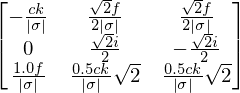

In [51]:
XN

In [72]:
"""
Transformation matrices to normal mode
W1 --[T21]--> W2 --[T32]--> W3 --[TN3]---> N
"""
W1 = Matrix( [u,v,eta] )
T21 = Matrix(( [-1j*ky, 1j*kx, 0],[1j*kx,1j*ky,0],[0,0,ck] ))
W2 = T21 * W1 
T32 = Matrix(( [1, 0, -f/ck],[f,0,ck],[0,1,0] ))
W3 = T32 * W2
TN3 = Matrix([ [1,0,0],[0,1,-1j*sigma],[0,1,1j*sigma]]) / (sqrt(2) * sigma)
N = simplify(subck((TN3 * W3).subs(sigma, sqrt(f**2 + ck**2))))

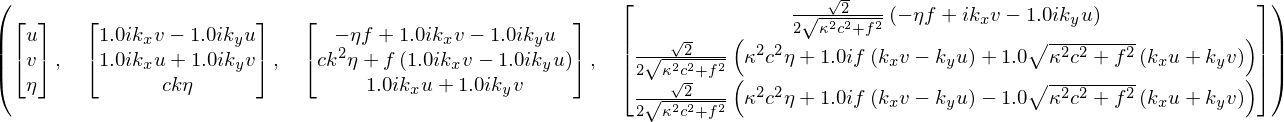

In [73]:
W1, W2, W3, N

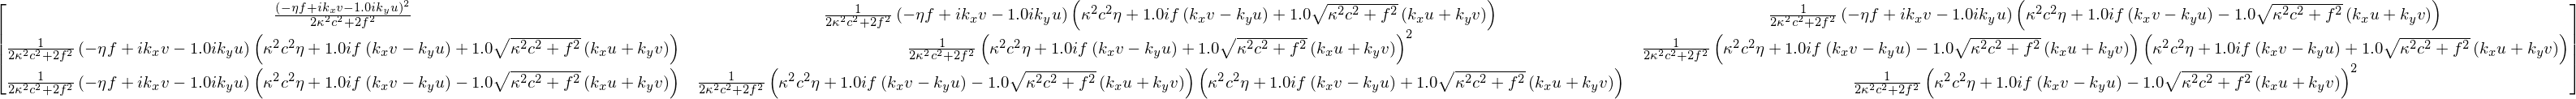

In [79]:
(N * N.transpose())